In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


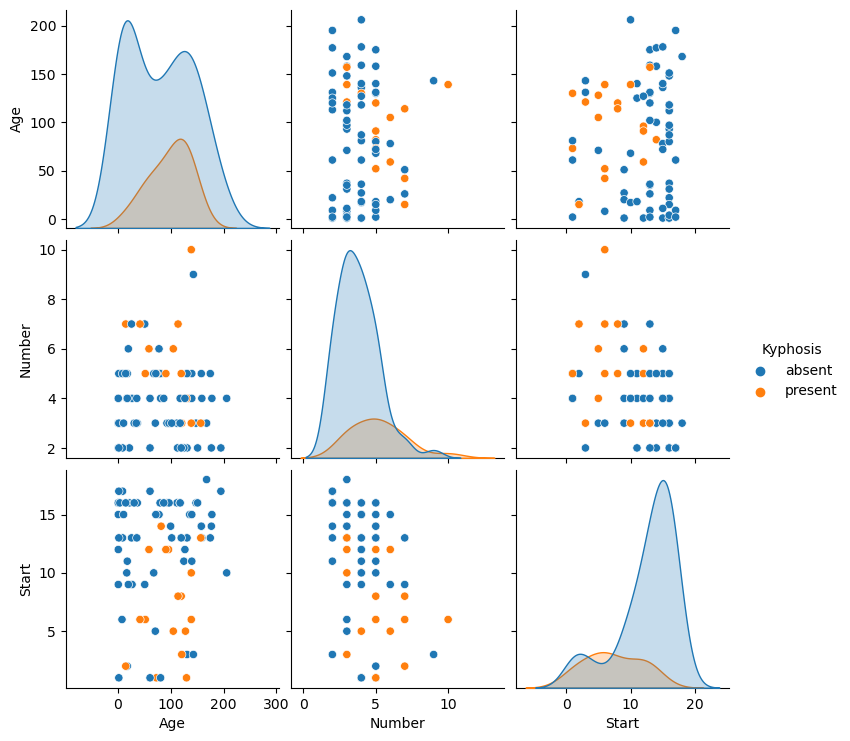

In [4]:
sns.pairplot(df, hue = 'Kyphosis')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis =1)

In [7]:
y = df['Kyphosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
predictions = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print (confusion_matrix(y_test,predictions))
print (classification_report(y_test, predictions))

[[16  4]
 [ 1  4]]
              precision    recall  f1-score   support

      absent       0.94      0.80      0.86        20
     present       0.50      0.80      0.62         5

    accuracy                           0.80        25
   macro avg       0.72      0.80      0.74        25
weighted avg       0.85      0.80      0.81        25



In [15]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(n_estimators=100)

In [21]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
rfc_pred = rfc.predict(X_test)

In [23]:
print (confusion_matrix(y_test,rfc_pred))
print (classification_report(y_test, rfc_pred))

[[19  1]
 [ 2  3]]
              precision    recall  f1-score   support

      absent       0.90      0.95      0.93        20
     present       0.75      0.60      0.67         5

    accuracy                           0.88        25
   macro avg       0.83      0.77      0.80        25
weighted avg       0.87      0.88      0.87        25



### Project

In [25]:
loans = pd.read_csv('loan_data.csv')

Text(0.5, 0, 'FICO')

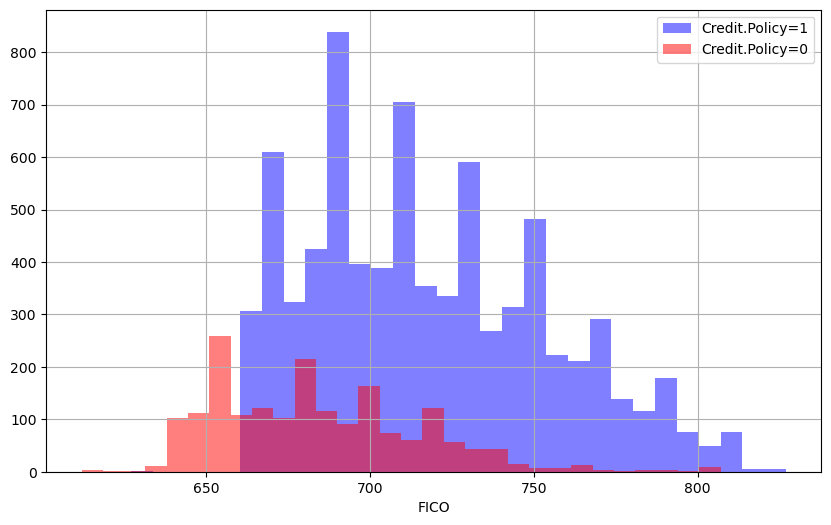

In [27]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

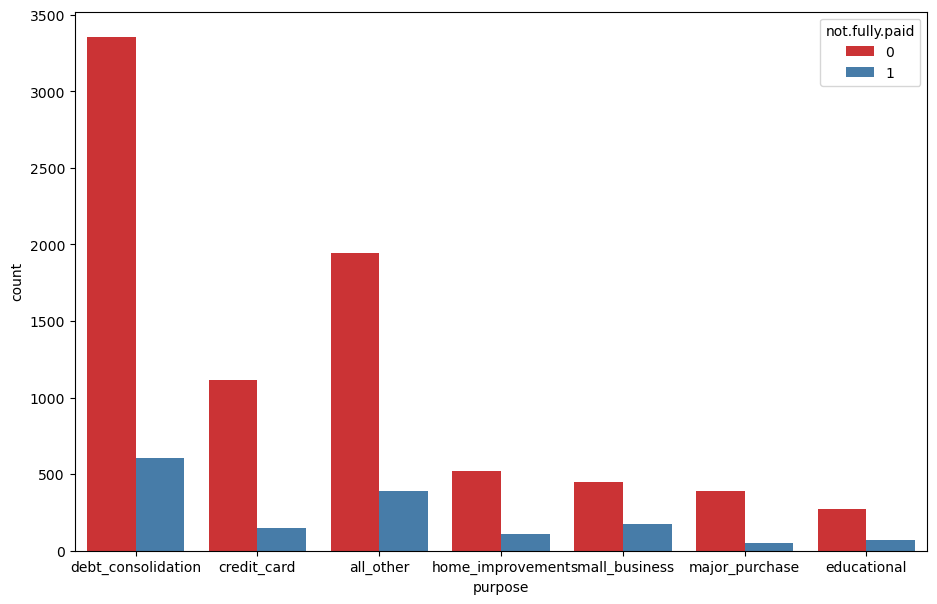

In [28]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

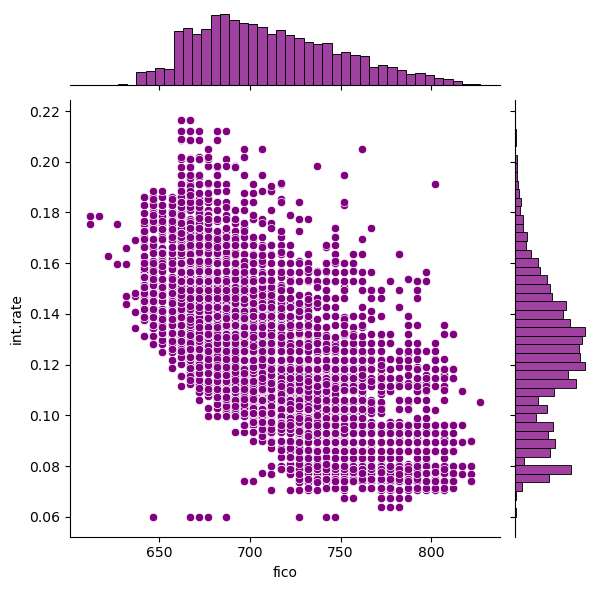

In [29]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 1100x700 with 0 Axes>

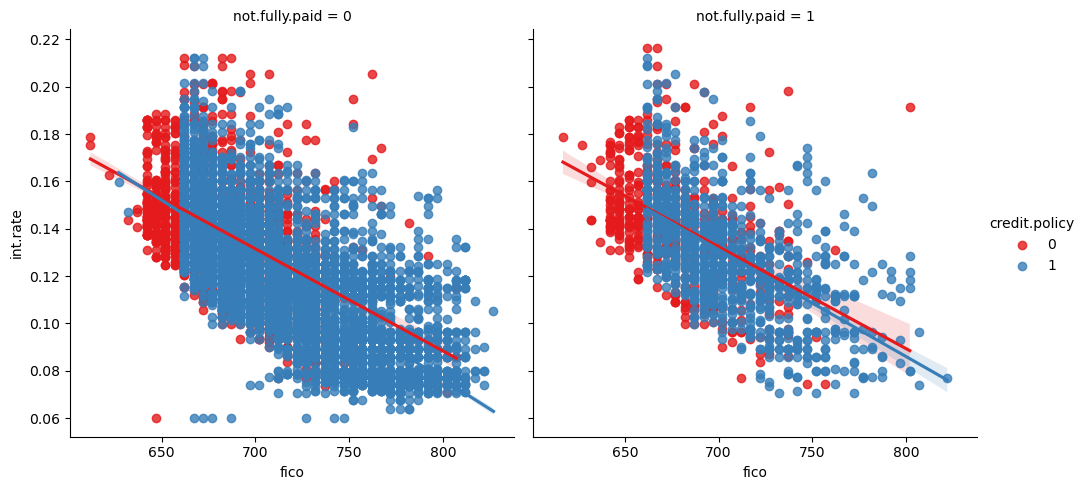

In [30]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [31]:
cat_feats = ['purpose']

In [32]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [33]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [34]:
dtree = DecisionTreeClassifier()

In [35]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
predictions = dtree.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [39]:
print(confusion_matrix(y_test,predictions))

[[1979  452]
 [ 338  105]]


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier(n_estimators=600)

In [52]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [53]:
predictions = rfc.predict(X_test)

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.57      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [55]:
print(confusion_matrix(y_test,predictions))

[[2425    6]
 [ 435    8]]
